In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#list of useful imports that  I will use
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd

import numpy as np

import seaborn as sns
import random
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
# Imputer
#from sklearn.preprocessing import Imputer

from sklearn.impute import SimpleImputer


In [2]:
# Reading Dataset
data=pd.read_csv(r"C:\Users\ST-008\Desktop\Flipkart\DATASET\Dataset-SA.csv")
data

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205044,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205045,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205046,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


In [3]:
data["Review"] = data['Review'].astype(str) +"-"+ data["Summary"]

In [4]:
data.shape

(205049, 6)

In [5]:
data.columns

Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment'],
      dtype='object')

In [6]:
data

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!-great cooler excellent air flow and for...,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome-best budget 2 fit cooler nice cooling,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair-the quality is good but the power of air ...,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product-very bad product its a only a fan,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair-ok ok product,ok ok product,neutral
...,...,...,...,...,...,...
205044,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!-good product,good product,positive
205045,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!-nice,nice,positive
205046,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice-very nice and fast delivery,very nice and fast delivery,positive
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!-awesome product,awesome product,positive


In [7]:
# let us check the missing values in our dataset

data.isnull().sum()

product_name      0
product_price     0
Rate              0
Review           11
Summary          11
Sentiment         0
dtype: int64

In [8]:
data=data.drop(columns=["Summary"])
data

,product_name,product_price,Rate,Review,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!-great cooler excellent air flow and for...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome-best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair-the quality is good but the power of air ...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product-very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair-ok ok product,neutral
...,...,...,...,...,...
205044,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!-good product,positive
205045,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!-nice,positive
205046,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice-very nice and fast delivery,positive
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!-awesome product,positive


In [9]:
data.fillna(' ', inplace=True)

In [10]:
data['Rate'].value_counts()

5    118765
4     41894
1     21300
3     16599
2      6491
Name: Rate, dtype: int64

C:\Users\ST-008\AppData\Local\Temp\ipykernel_1644\3284205060.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df['Rate'], rotation=60, horizontalalignment= 'right')


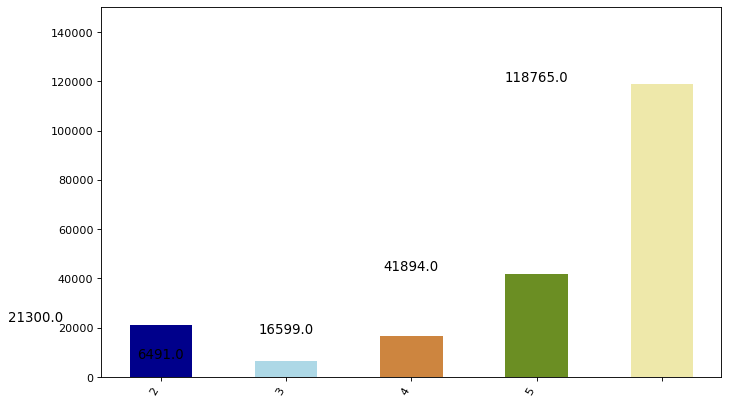

In [11]:
df = data.groupby('Rate').size().reset_index(name='counts')
n = df['Rate'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(10,6), dpi= 80)
plt.bar(df['Rate'], df['counts'], color=c, width=.5)
for i, val in enumerate(df['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df['Rate'], rotation=60, horizontalalignment= 'right')

plt.ylim(0, 150000)
plt.show()

In [12]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = data[data['Rate']== 5]
df_minority1 = data[data['Rate']== 4]
df_minority2 = data[data['Rate']== 3]
df_minority3 = data[data['Rate']== 2]
df_minority4 = data[data['Rate']== 1]
 
# Downsample majority class and upsample the minority class
df_minority4_upsampled = resample(df_minority4, replace=True,n_samples=50000,random_state=123) 
df_minority3_upsampled = resample(df_minority3, replace=True,n_samples=50000,random_state=123)
df_minority2_upsampled = resample(df_minority2, replace=True,n_samples=50000,random_state=123) 
df_minority1_upsampled = resample(df_minority1, replace=True,n_samples=50000,random_state=123)
df_majority_downsampled = resample(df_majority, replace=True,n_samples=50000,random_state=123) 

 
 
# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_minority4_upsampled,df_minority3_upsampled,df_minority2_upsampled,df_minority1_upsampled,df_majority_downsampled])
 
# Display new class counts
df_upsampled['Rate'].value_counts()

1    50000
2    50000
3    50000
4    50000
5    50000
Name: Rate, dtype: int64

In [13]:
# shuffle the DataFrame rows 
data= df_upsampled.sample(frac = 1)

C:\Users\ST-008\AppData\Local\Temp\ipykernel_1644\2110935023.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df['Rate'], rotation=60, horizontalalignment= 'right')


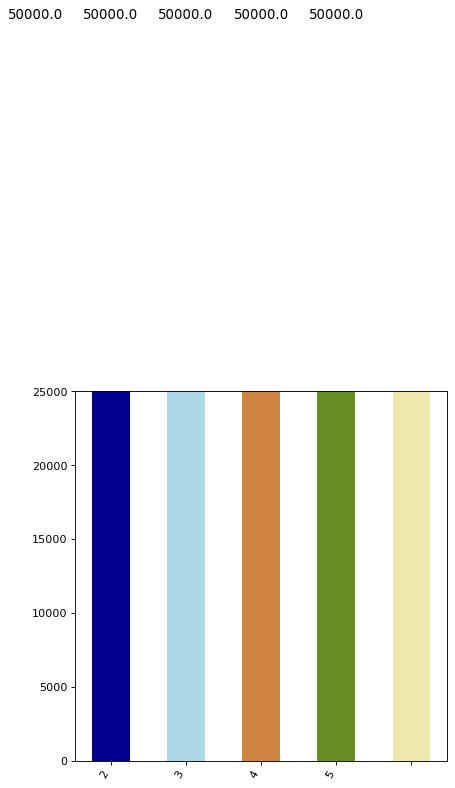

In [14]:
# Prepare Data
df = data.groupby('Rate').size().reset_index(name='counts')
n = df['Rate'].unique().__len__()
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(6,6), dpi= 80)
plt.bar(df['Rate'], df['counts'], color=c, width=.5)
for i, val in enumerate(df['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df['Rate'], rotation=60, horizontalalignment= 'right')

plt.ylim(0,25000)
plt.show()

In [15]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [16]:
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
data['Review'].head(5)

132052                                       fabulous!-good
123796    expected a better product-bluetooth not workin...
165930                            terrific purchase-perfect
122008    worthless-most of the apps dont change to land...
79484     must buy!-its good affordable nonsticky smooth...
Name: Review, dtype: object

In [18]:
print("printing some random reviews")
print(9, data['Review'].values[9])
print(34, data['Review'].values[34])
print(147, data['Review'].values[147])

printing some random reviews
9 not specified-super
34 nan-very nice product i am so glad
147 nan-bad product


In [19]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [20]:
preprocessed_text = preprocess_text(data['Review'].values)

100%|██████████| 250000/250000 [00:12<00:00, 20289.04it/s]


In [21]:
print("printing some random reviews")
print(9, preprocessed_text[9])
print(34, preprocessed_text[34])
print(147, preprocessed_text[147])

printing some random reviews
9 not specified super
34 nan nice product glad
147 nan bad product


In [22]:
y=np.array(data['Rate'])

In [23]:
from sklearn.model_selection import train_test_split
#Breaking into Train and test
X_train, X_test, y_train, y_test = train_test_split(preprocessed_text, y, test_size=0.3,stratify=y ,random_state=42)

In [24]:
import pickle

In [25]:
from sklearn import preprocessing

count_vect = CountVectorizer(max_features = 5000)
count_trans = count_vect.fit(X_train) # fit has to happen only on train data

# Dump the file
pickle.dump(count_trans, open(r"C:\Users\ST-008\Desktop\Flipkart\CODE\FRONT END\new_project/count_vect.pkl", "wb"))


# Testing phase
count = pickle.load(open(r"C:\Users\ST-008\Desktop\Flipkart\CODE\FRONT END\new_project/count_vect.pkl", 'rb'))

# we use the fitted CountVectorizer to convert the text to vector
X_train_count =count.transform(X_train)
X_test_count = count.transform(X_test)

#Normalize Data
X_train_count = preprocessing.normalize(X_train_count)
print("Train Data Size: ",X_train_count.shape)

#Normalize Data
X_test_count = preprocessing.normalize(X_test_count)
print("Test Data Size: ",X_test_count.shape)


Train Data Size:  (175000, 5000)
Test Data Size:  (75000, 5000)


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
import warnings
warnings.filterwarnings("ignore")

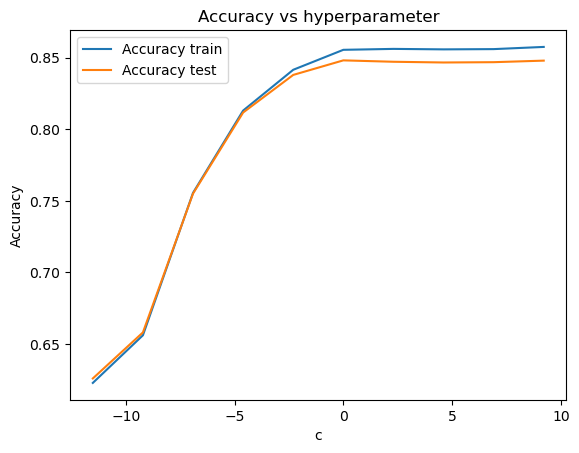

optimal c for which auc is maximum :  1


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math

c = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
test_auc = []

for i in c:
    log = LogisticRegression(penalty='l2',C=i)
    log.fit(X_train_count,y_train)
    prob_test = log.predict(X_test_count)
    test_auc.append(accuracy_score(y_test,prob_test))
    prob_train = log.predict(X_train_count)
    train_auc.append(accuracy_score(y_train,prob_train))
optimal_c= c[test_auc.index(max(test_auc))]
c = [math.log(x) for x in c]

#plot accuracy vs alpha
x = plt.subplot( )
x.plot(c, train_auc, label='Accuracy train')
x.plot(c, test_auc, label='Accuracy test')
plt.title('Accuracy vs hyperparameter')
plt.xlabel('c')
plt.ylabel('Accuracy')
x.legend()
plt.show()

print('optimal c for which auc is maximum : ',optimal_c)

Accuracy on Test data is 0.8481066666666667
Accuracy on Train data is 0.8554742857142857
---------------------------


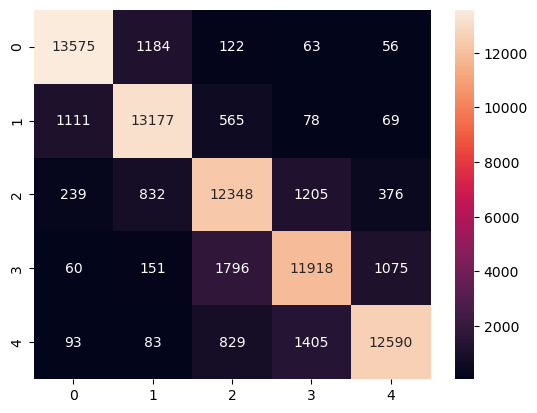

In [29]:
#Testing AUC on Test data
log = LogisticRegression(penalty='l2',C=optimal_c)
log.fit(X_train_count,y_train)

filename = r'C:\Users\ST-008\Desktop\Flipkart\CODE\FRONT END\new_project/Flipkart_log_bow.pkl'
pickle.dump(log, open(filename, 'wb'))

pred_test =log.predict(X_test_count)
test_accuracy = accuracy_score(y_test, pred_test)
pred_train = log.predict(X_train_count)
train_accuracy =accuracy_score(y_train,pred_train) 

print("Accuracy on Test data is " +str(accuracy_score(y_test,pred_test)))
print("Accuracy on Train data is " +str(accuracy_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
from sklearn.metrics import confusion_matrix

df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test))
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [30]:
results=pd.DataFrame(columns=['Featuraization', 'Model' , 'Train-AUC', 'Test-AUC' ])
new = ['BOW','Logistic Regression',0.8565,0.8478]
results.loc[0] = new

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve

Accuracy on Test data is 0.9063733333333334
Accuracy on Train data is 0.9286857142857143
---------------------------


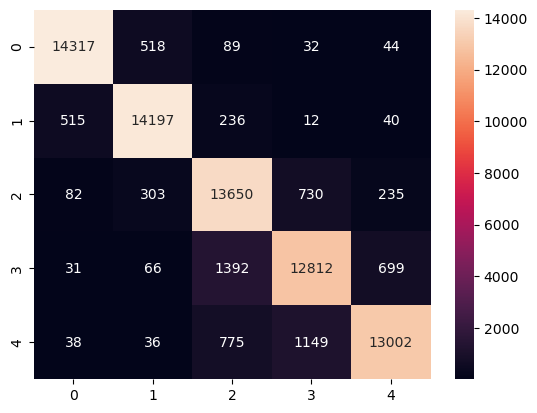

In [32]:
#training our model for max_depth=100,n_estimators = 120
clf = RandomForestClassifier(max_depth = 100,n_estimators =120)
clf.fit(X_train_count,y_train)

import pickle
filename = r'C:\Users\ST-008\Desktop\Flipkart\CODE\FRONT END\new_project/Flipkart_RF_bow.pkl'
pickle.dump(clf, open(filename, 'wb'))

pred_test =clf.predict(X_test_count)
test_accuracy = accuracy_score(y_test, pred_test)
pred_train = clf.predict(X_train_count)
train_accuracy =accuracy_score(y_train,pred_train)


print("Accuracy on Test data is " +str(test_accuracy))
print("Accuracy on Train data is "+str(train_accuracy))

print("---------------------------")

# Code for drawing seaborn heatmaps

df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test))
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           1       0.96      0.95      0.96     15000
           2       0.94      0.95      0.94     15000
           3       0.85      0.91      0.88     15000
           4       0.87      0.85      0.86     15000
           5       0.93      0.87      0.90     15000

    accuracy                           0.91     75000
   macro avg       0.91      0.91      0.91     75000
weighted avg       0.91      0.91      0.91     75000



In [34]:
new = ['BOW','Random Forest',0.9277,0.9073]
results.loc[1] = new

In [35]:
results

,Featuraization,Model,Train-AUC,Test-AUC
0,BOW,Logistic Regression,0.8565,0.8478
1,BOW,Random Forest,0.9277,0.9073
